In [45]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Setting up a seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [46]:
# Paths to the dataset
data_dir = 'data'
class_names = os.listdir(data_dir)

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [47]:
# Load the data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 410 images belonging to 2 classes.


In [48]:
# Function to display images
def display_images(images, labels, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.show()


In [49]:
# Function to get images from each class
def get_images_from_class(generator, class_index, num_images):
    images, labels = [], []
    for _ in range(len(generator)):
        batch_images, batch_labels = next(generator)
        class_images = batch_images[batch_labels == class_index]
        class_labels = batch_labels[batch_labels == class_index]
        images.extend(class_images)
        labels.extend(class_labels)
        if len(images) >= num_images:
            break
    return np.array(images[:num_images]), np.array(labels[:num_images])

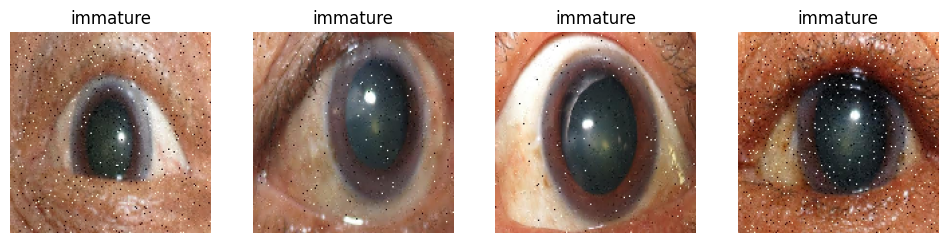

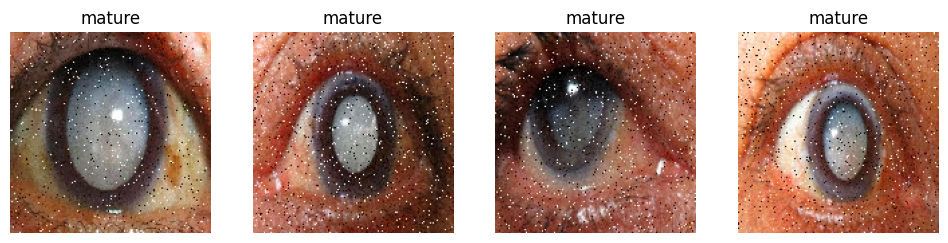

In [50]:
# Display 4 images from each class
num_classes = len(class_names)
num_images_to_display = 4

for class_index in range(num_classes):
    class_images, class_labels = get_images_from_class(train_generator, class_index, num_images_to_display)
    display_images(class_images, class_labels, class_names)

In [51]:


# Paths to the dataset
data_dir = 'data'
class_names = os.listdir(data_dir)

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load the data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Extract file paths and labels
file_paths = train_generator.filepaths
labels = train_generator.classes

# Create a DataFrame
data_df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})

# Map labels to class names
data_df['class_name'] = data_df['label'].map(lambda x: class_names[x])

data_df.head()


Found 410 images belonging to 2 classes.


,file_path,label,class_name
0,data\immature\10_JPG.rf.840164aaa4c67134393447...,0,immature
1,data\immature\10_JPG.rf.faba8129f089f732310fb2...,0,immature
2,data\immature\10_JPG_jpg.rf.005c5020edb7161293...,0,immature
3,data\immature\10_JPG_jpg.rf.6b59db7b0080ada861...,0,immature
4,data\immature\10_JPG_jpg.rf.80e6e9a166ac6e6389...,0,immature


In [52]:
# Check for null values
print("Checking for null values:")
print(data_df.isnull().sum())

# Drop rows with null values, if any
data_df.dropna(inplace=True)

# Check for duplicates
print("Checking for duplicate rows:")
print(data_df.duplicated().sum())

# Drop duplicate rows, if any
data_df.drop_duplicates(inplace=True)

# Verify the changes
print("After dropping nulls and duplicates:")
print(data_df.isnull().sum())
print(data_df.duplicated().sum())

# Display the first few rows of the cleaned DataFrame
data_df.head(10)


Checking for null values:
file_path     0
label         0
class_name    0
dtype: int64
Checking for duplicate rows:
0
After dropping nulls and duplicates:
file_path     0
label         0
class_name    0
dtype: int64
0


,file_path,label,class_name
0,data\immature\10_JPG.rf.840164aaa4c67134393447...,0,immature
1,data\immature\10_JPG.rf.faba8129f089f732310fb2...,0,immature
2,data\immature\10_JPG_jpg.rf.005c5020edb7161293...,0,immature
3,data\immature\10_JPG_jpg.rf.6b59db7b0080ada861...,0,immature
4,data\immature\10_JPG_jpg.rf.80e6e9a166ac6e6389...,0,immature
5,data\immature\10_JPG_jpg.rf.a3b10d94e424c24a0d...,0,immature
6,data\immature\10_JPG_jpg.rf.c5647f4bd0393652db...,0,immature
7,data\immature\10_JPG_jpg.rf.c6b04a42d93b417a62...,0,immature
8,data\immature\11_JPG.rf.457d048cb97a02a8773cef...,0,immature
9,data\immature\11_JPG.rf.fe4b97480b60e61609bf62...,0,immature


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


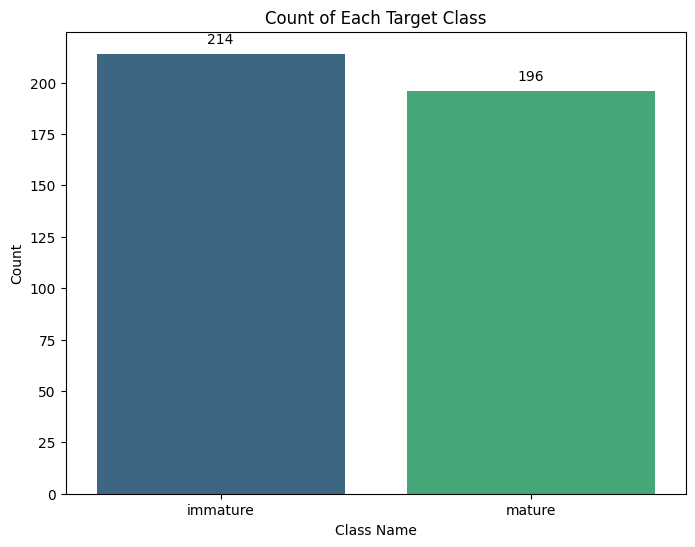

In [53]:
# Plot the count of each target class
plt.figure(figsize=(8, 6))
count_plot = sns.countplot(x='class_name', data=data_df, palette='viridis')

# Add annotations
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points')

# Set the title and labels
plt.title('Count of Each Target Class')
plt.xlabel('Class Name')
plt.ylabel('Count')

# Show the plot
plt.show()

In [54]:
# Define directories for training data
data_dir = 'data'

# Initialize the ImageDataGenerator for training with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

# Load the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use only the training subset
)

# Load the validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use only the validation subset
)


Found 329 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [55]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [56]:
# Compile the model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 19034177 (72.61 MB)
Trainable params: 19034177 (72.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/50
10/10 [==============================] - 7s 525ms/step - loss: 0.9173 - accuracy: 0.5623 - val_loss: 0.7029 - val_accuracy: 0.4844
Epoch 2/50
10/10 [==============================] - 4s 442ms/step - loss: 0.6980 - accuracy: 0.5118 - val_loss: 0.6723 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 4s 436ms/step - loss: 0.6715 - accuracy: 0.5825 - val_loss: 0.6369 - val_accuracy: 0.7188
Epoch 4/50
10/10 [==============================] - 5s 453ms/step - loss: 0.6621 - accuracy: 0.6229 - val_loss: 0.5646 - val_accuracy: 0.8750
Epoch 5/50
10/10 [==============================] - 4s 421ms/step - loss: 0.6055 - accuracy: 0.6700 - val_loss: 0.5529 - val_accuracy: 0.7031
Epoch 6/50
10/10 [==============================] - 6s 652ms/step - loss: 0.5642 - accuracy: 0.7156 - val_loss: 0.4753 - val_accuracy: 0.7969
Epoch 7/50
10/10 [==============================] - 9s 918ms/step - loss: 0.6135 - accuracy: 0.6902 - val_loss: 0.5519 - val_accuracy: 0.7812
Epoch 

In [58]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


3/3 [==============================] - 1s 166ms/step - loss: 0.2925 - accuracy: 0.9012
Validation Loss: 0.29248887300491333
Validation Accuracy: 0.9012345671653748


Text(0.5, 1.0, 'Accuracy')

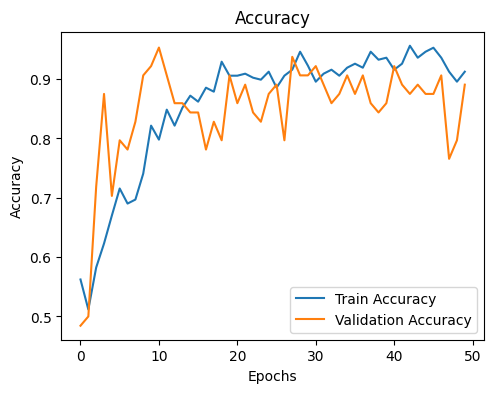

In [59]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')




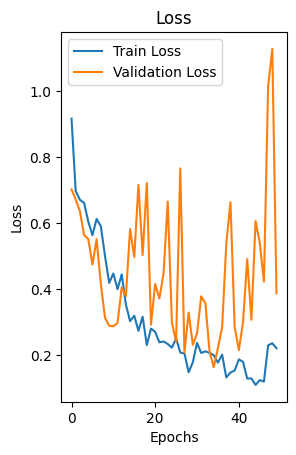

In [61]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [62]:
model.save('model89.h5')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(150, 150)):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Rescale the pixel values
    img_array = img_array / 255.0
    # Expand dimensions to match the model input
    img_array = tf.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    # Make predictions
    predictions = model.predict(img_array)
    # Convert predictions to class label
    class_index = (predictions > 0.5).astype("int32")[0][0]
    class_labels = ['immature', 'mature']  # Replace with your actual class labels
    return class_labels[class_index], predictions[0][0]

# Example usage
image_path = r'C:\Users\Admin\OneDrive\Desktop\cataract disease classification\archive (5)\data\mature\2_JPG.rf.8b22a8cb6522a1ad0068094fd6f3e355.jpg'
predicted_class, confidence = predict_image(model, image_path)
print(f'Predicted class: {predicted_class}')
print(f'Confidence: {confidence:.2f}')


1/1 [==============================] - 0s 160ms/step
Predicted class: mature
Confidence: 0.99


In [ ]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model from the specified path
model_path = 'model89.h5'
model = tf.keras.models.load_model(model_path)

def preprocess_image(image, target_size=(150, 150)):
    # Convert the PIL image to a NumPy array
    img_array = img_to_array(image)
    # Resize the image to match the model's expected input size
    img_array = tf.image.resize(img_array, target_size)
    # Rescale the pixel values
    img_array = img_array / 255.0
    # Expand dimensions to match the model input
    img_array = tf.expand_dims(img_array, axis=0)
    return img_array

def predict_image(image):
    # Preprocess the image
    img_array = preprocess_image(image)
    # Make predictions
    predictions = model.predict(img_array)
    # Convert predictions to class label and confidence score
    class_index = (predictions > 0.5).astype("int32")[0][0]
    class_labels = ['Immature', 'Mature']  # Replace with your actual class labels
    predicted_class = class_labels[class_index]
    confidence_score = predictions[0][0]
    return predicted_class, confidence_score

# Create Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Label(num_top_classes=1), gr.Textbox(label="Confidence Score")],
    title="Cataract Disease Classification",
    description="Upload an image to classify it as 'immature' or 'mature' cataract. The confidence score is also provided."
)

# Launch the Gradio app
interface.launch()


Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 92ms/step
